In [1]:
from datasets import load_dataset
dataset = load_dataset("iamtarun/code_instructions_120k_alpaca")

/home/user/miniconda3/envs/pythonr_3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# convert dataset to df
import pandas as pd
df = pd.DataFrame(dataset['train'])

In [3]:
df.head()

,instruction,input,output,prompt
0,Create a function to calculate the sum of a se...,"[1, 2, 3, 4, 5]",# Python code\ndef sum_sequence(sequence):\n ...,Below is an instruction that describes a task....
1,Develop a function that will add two strings,"str1 = ""Hello ""\nstr2 = ""world""","def add_strings(str1, str2):\n """"""This func...",Below is an instruction that describes a task....
2,Design a data structure in C++ to store inform...,,#include <map>\n#include <string>\n\nclass Gro...,Below is an instruction that describes a task....
3,Implement a sorting algorithm to sort a given ...,"[3, 1, 4, 5, 9, 0]",def bubble_sort(arr):\n n = len(arr)\n \n ...,Below is an instruction that describes a task....
4,Design a Swift application for tracking expens...,Not applicable,import UIKit\n\nclass ExpenseViewController: U...,Below is an instruction that describes a task....


In [27]:
df.describe()

,instruction,input,output,prompt
count,121959,121959,121959,121959
unique,121683,52096,120724,121957
top,Optimize the following SQL query.,,^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$,Below is an instruction that describes a task....
freq,6,35540,41,3


121959

In [19]:
def remove_outliers(df, column):
    Q1 = df[column].apply(len).quantile(0.25)
    Q3 = df[column].apply(len).quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column].apply(len) >= lower_bound) & (df[column].apply(len) <= upper_bound)]

df_no_outliers = df.copy()
for column in ['instruction', 'input', 'output', 'prompt']:
    df_no_outliers = remove_outliers(df_no_outliers, column)

df_no_outliers.describe()

,instruction,input,output,prompt
count,97176,97176,97176,97176
unique,96970,38866,96051,97174
top,Write a Python program to format a specified s...,,^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$,Below is an instruction that describes a task....
freq,5,32146,41,3


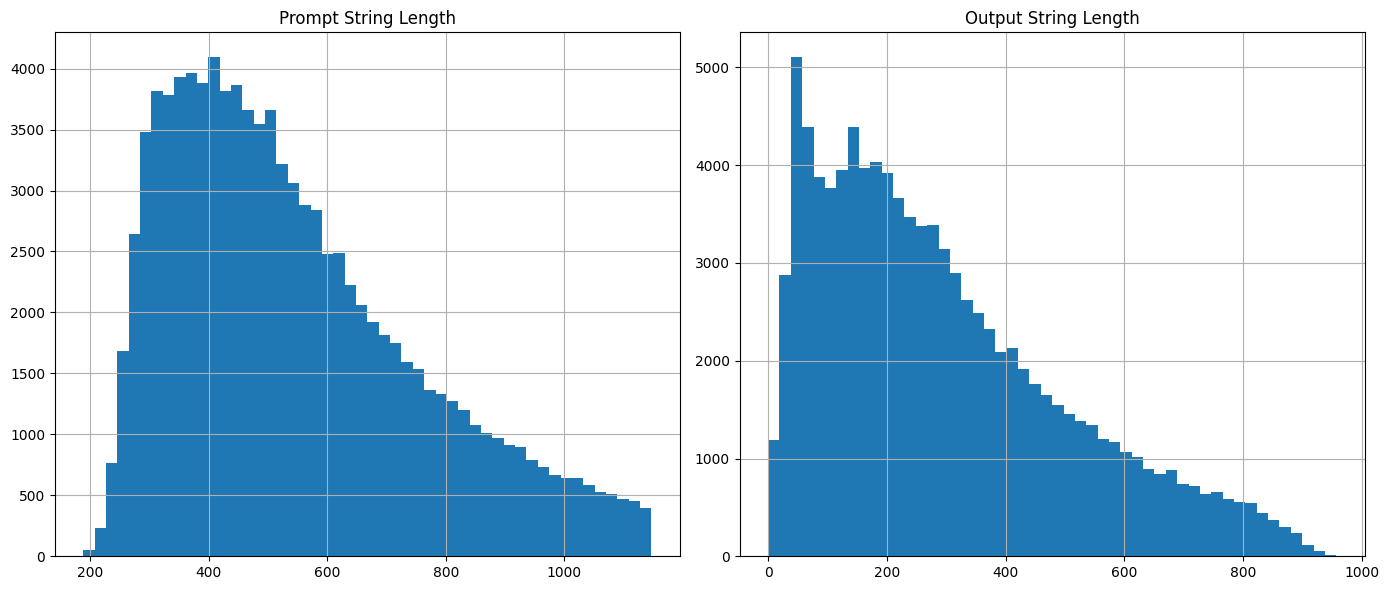

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for 'prompt'
axes[0].hist(df_no_outliers['prompt'].apply(len), bins=50)
axes[0].set_title('Prompt String Length')
axes[0].grid()

# Plot histogram for 'output'
axes[1].hist(df_no_outliers['output'].apply(len), bins=50)
axes[1].set_title('Output String Length')
axes[1].grid()

plt.tight_layout()
fig.savefig('dataset_hist.png')
plt.show()

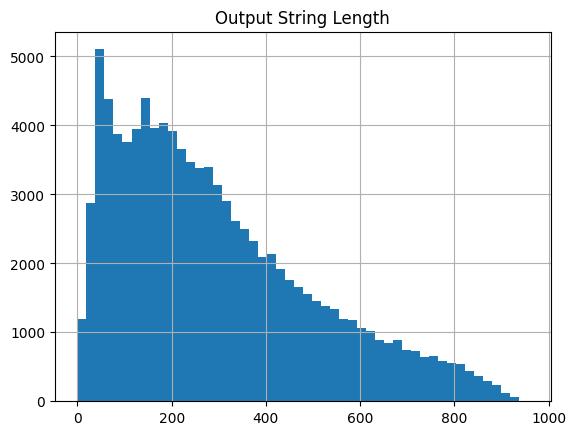

In [21]:
plt.hist(df_no_outliers['output'].apply(len), bins=50)
plt.title('Output String Length')
plt.grid()
plt.show()

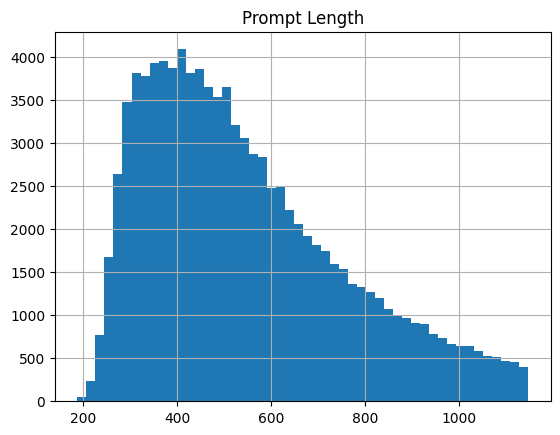

In [36]:
plt.hist(df_no_outliers['prompt'].apply(len), bins=50)
plt.title('Prompt Length')
plt.grid()
plt.savefig('dataset_prompt_hist.png')
plt.show()

In [28]:
import pandas as pd

def get_stat(df):
    stats = {}
    for col in df.columns:
        lengths = df[col].astype(str).apply(len)
        stats[col] = {
            'min': float(lengths.min()),
            'max': float(lengths.max()),
            'avg': float(lengths.mean()),
            'median': float(lengths.median())
        }
    return stats

In [29]:
means_dict = get_stat(df)
means_dict

{'instruction': {'min': 18.0,
  'max': 7755.0,
  'avg': 92.11350535835814,
  'median': 81.0},
 'input': {'min': 0.0,
  'max': 1423.0,
  'avg': 28.603407702588576,
  'median': 14.0},
 'output': {'min': 0.0,
  'max': 20779.0,
  'avg': 425.96856320566746,
  'median': 283.0},
 'prompt': {'min': 188.0,
  'max': 21437.0,
  'avg': 699.6854762666142,
  'median': 552.0}}

In [5]:
700*120000/3

28000000.0

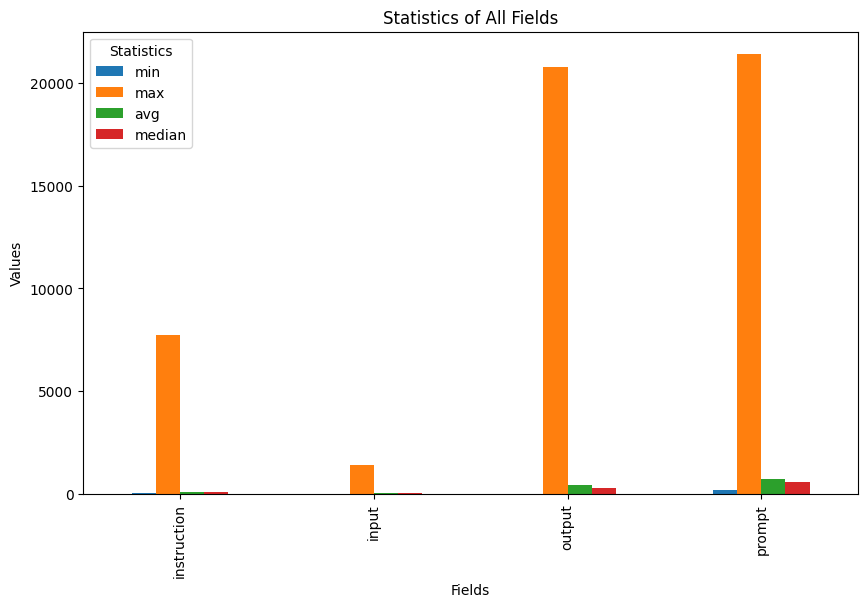

In [13]:
import matplotlib.pyplot as plt

df = pd.DataFrame(means_dict)

# Transpose the DataFrame to have the statistics as columns
df = df.T

# Plotting the statistics
df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Fields')
plt.ylabel('Values')
plt.title('Statistics of All Fields')
plt.legend(title='Statistics')
plt.show()

In [31]:
sampled_df = df_no_outliers.sample(n=120)
sampled_df

,instruction,input,output,prompt
81577,What is the best way to sort an array of integ...,,def sortDescending(arr):\n arr.sort(reverse...,Below is an instruction that describes a task....
66441,Create a MySQL database to store information a...,Not applicable,CREATE TABLE `products` \n (\n `id` INT NOT N...,Below is an instruction that describes a task....
56951,Provide a C program that takes a single charac...,'a',#include <stdio.h>\n \nint main(){\n char c...,Below is an instruction that describes a task....
98888,Calculate the sum of the digits in a given int...,123,def sum_digits(n):\n s = 0\n while n:\n ...,Below is an instruction that describes a task....
29085,Generate a random password consisting of upper...,Not applicable,R7w@77!L,Below is an instruction that describes a task....
...,...,...,...,...
9958,Write a Java program to clone an array of stri...,"[“First”, “Second”, “Third”]",public class CloneStringArray {\n \n publi...,Below is an instruction that describes a task....
38732,Create a Swift program to sort a dictionary by...,"let dict = [""dog"": 7, ""cat"": 2, ""bird"": 4]",let sortedDict = dict.sorted { $0.value < $1.v...,Below is an instruction that describes a task....
94640,Develop a program to calculate the square root...,,def sqrt(number):\n guess = number / 2.0\n ...,Below is an instruction that describes a task....
79859,Generate a snippet code that deletes a user fr...,Table name: users\nPrimary key: user_id,DELETE FROM users WHERE user_id = ?;,Below is an instruction that describes a task....


In [32]:
# convert sampled_df to json
sampled_df.to_json('sampled_df.json', orient='records')

In [34]:
for k, v in sampled_df.iterrows():
    print(v['prompt'])
    # print(v['instruction'])
    # print(v['input'])
    print(v['output'])
    print('\n\n')

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is the best way to sort an array of integers in descending order?

### Input:


### Response:
def sortDescending(arr):
    arr.sort(reverse=True)
    return arr
def sortDescending(arr):
    arr.sort(reverse=True)
    return arr



Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Create a MySQL database to store information about products and their prices, including an auto-incrementing primary key

### Input:
Not applicable

### Response:
CREATE TABLE `products` 
 (
  `id` INT NOT NULL AUTO_INCREMENT, 
  `name` VARCHAR(255) NOT NULL, 
  `price` DECIMAL(10,2) NOT NULL, 
  PRIMARY KEY (`id`)
  );
CREATE TABLE `products` 
 (
  `id` INT NOT NULL AUTO_INCREMENT, 
  `name` VARCHAR(255) NOT NULL, 
  `price` DECIMAL(10,2) NOT NULL, 
  PRIMARY KEY (`id`)
  );



Below is an instruction that des